In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
df=pd.read_csv('HR_comma_sep.csv')

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [16]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
df.rename(columns={'sales':'department'},inplace=True)

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
df.left.unique()

array([1, 0], dtype=int64)

In [20]:
x=df.drop('left',axis=1)
y=df.left

In [21]:
x=pd.get_dummies(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=101)
clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=130,random_state=400).fit(x_train,y_train)

In [23]:
clf.oob_score_

0.9923225849522666

In [24]:
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)>

In [25]:
l={}
for i in range(10,300,20):
    clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=i,random_state=400).fit(x_train,y_train)
    l.update({i:clf.oob_score_})

l

C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\shubham jain\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


{10: 0.9840443287268843,
 30: 0.9904533012884705,
 50: 0.991187662727819,
 70: 0.9919887842980172,
 90: 0.9921890646905668,
 110: 0.992122304559717,
 130: 0.9923225849522666,
 150: 0.992122304559717,
 170: 0.9920555444288671,
 190: 0.992122304559717,
 210: 0.992122304559717,
 230: 0.9920555444288671,
 250: 0.992122304559717,
 270: 0.9921890646905668,
 290: 0.9921890646905668}

In [26]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

C:\Users\shubham jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


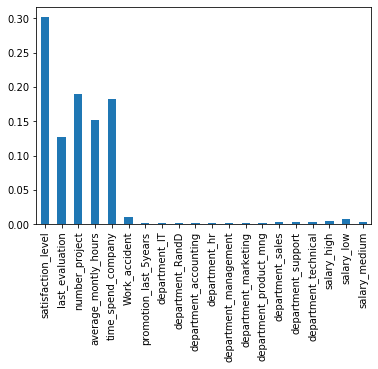

In [27]:
feature_importance=pd.Series(imp,index=x.columns.tolist())

feature_importance.plot('bar')